In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, GaussianNoise
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.backend import clear_session
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings("ignore")
seed = 1234
np.random.seed(seed)
from sklearn import svm, linear_model, ensemble, neighbors, tree, naive_bayes
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
# Importar librerías necesarias
import os
import joblib
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestRegressor
import pickle
from collections import Counter

/home/sespinoza/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sespinoza/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
2024-11-01 21:50:57.676535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 21:50:57.676577: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 21:50:57.678039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] U

In [2]:
# Carga de datos
DATA_PATH = '/data/sespinoza/objetivo2/model-iterativo/resultados_peru_bio_1/'
metricas = pd.read_csv(DATA_PATH + 'resultados_peru_bio_v2.csv', header=0, index_col=None, sep=',', encoding='utf-8')


In [3]:
metricas

,Model,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
0,svm,1.000000,1.000000,1.000000,1.000000,6,6,0,0
1,decision,0.916667,0.916084,0.845154,0.916667,5,6,0,1
2,random,1.000000,1.000000,1.000000,1.000000,6,6,0,0
3,naive,1.000000,1.000000,1.000000,1.000000,6,6,0,0
4,mlp,1.000000,1.000000,1.000000,1.000000,6,6,0,0
...,...,...,...,...,...,...,...,...,...
75,naive,1.000000,1.000000,1.000000,1.000000,5,7,0,0
76,mlp,0.916667,0.917249,0.845154,0.928571,5,6,1,0
77,logistic,1.000000,1.000000,1.000000,1.000000,5,7,0,0
78,boosting,0.916667,0.917249,0.845154,0.928571,5,6,1,0


In [4]:
promedios_por_modelo_bio = metricas.groupby('Model').mean()

In [5]:
print(promedios_por_modelo_bio)

           Accuracy  F1 Score (weighted)       MCC  Balanced Accuracy   TP  \
Model                                                                        
boosting   0.841667             0.834386  0.733900           0.869464  4.0   
decision   0.875000             0.872399  0.770601           0.895417  4.1   
k-nearest  0.941667             0.945305  0.889278           0.958214  4.9   
logistic   0.958333             0.961855  0.920247           0.972500  4.9   
mlp        0.958333             0.960079  0.913077           0.964107  4.8   
naive      0.916667             0.909094  0.866215           0.933750  4.2   
random     0.941667             0.943878  0.888323           0.952500  4.6   
svm        0.958333             0.960311  0.915606           0.965000  4.7   

            TN   FP   FN  
Model                     
boosting   6.1  0.9  1.0  
decision   6.4  0.6  0.9  
k-nearest  6.4  0.6  0.1  
logistic   6.6  0.4  0.1  
mlp        6.7  0.3  0.2  
naive      6.8  0.2  0.8  
ran

In [6]:
desviacion_por_modelo_bio = metricas.groupby('Model').std()

In [7]:
print(desviacion_por_modelo_bio)

           Accuracy  F1 Score (weighted)       MCC  Balanced Accuracy  \
Model                                                                   
boosting   0.164101             0.190395  0.217571           0.120473   
decision   0.205067             0.220272  0.357102           0.169938   
k-nearest  0.079057             0.070549  0.149228           0.050614   
logistic   0.080985             0.071852  0.153280           0.050277   
mlp        0.058926             0.054811  0.126431           0.049160   
naive      0.184257             0.211141  0.260092           0.138701   
random     0.088279             0.084680  0.160775           0.068415   
svm        0.070820             0.066624  0.142722           0.056765   

                 TP        TN        FP        FN  
Model                                              
boosting   1.632993  1.286684  0.994429  2.211083  
decision   1.663330  1.349897  0.966092  2.183270  
k-nearest  1.449138  1.173788  0.966092  0.316228  
logistic 

In [8]:
promedios_por_modelo_bio

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.841667,0.834386,0.733900,0.869464,4.0,6.1,0.9,1.0
decision,0.875000,0.872399,0.770601,0.895417,4.1,6.4,0.6,0.9
k-nearest,0.941667,0.945305,0.889278,0.958214,4.9,6.4,0.6,0.1
logistic,0.958333,0.961855,0.920247,0.972500,4.9,6.6,0.4,0.1
mlp,0.958333,0.960079,0.913077,0.964107,4.8,6.7,0.3,0.2
naive,0.916667,0.909094,0.866215,0.933750,4.2,6.8,0.2,0.8
random,0.941667,0.943878,0.888323,0.952500,4.6,6.7,0.3,0.4
svm,0.958333,0.960311,0.915606,0.965000,4.7,6.8,0.2,0.3


In [9]:
desviacion_por_modelo_bio

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.164101,0.190395,0.217571,0.120473,1.632993,1.286684,0.994429,2.211083
decision,0.205067,0.220272,0.357102,0.169938,1.663330,1.349897,0.966092,2.183270
k-nearest,0.079057,0.070549,0.149228,0.050614,1.449138,1.173788,0.966092,0.316228
logistic,0.080985,0.071852,0.153280,0.050277,1.449138,1.173788,0.966092,0.316228
mlp,0.058926,0.054811,0.126431,0.049160,1.549193,1.337494,0.674949,0.421637
naive,0.184257,0.211141,0.260092,0.138701,1.751190,1.316561,0.632456,2.201010
random,0.088279,0.084680,0.160775,0.068415,1.349897,1.251666,0.674949,0.966092
svm,0.070820,0.066624,0.142722,0.056765,1.418136,1.316561,0.632456,0.674949


In [10]:
# Carga de datos
DATA_PATH = '/data/sespinoza/objetivo2/model-iterativo/resultados_peru/'
metricas_2 = pd.read_csv(DATA_PATH + 'resultados_peru_v1.csv', header=0, index_col=None, sep=',', encoding='utf-8')

In [11]:
metricas_2

,Model,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
0,svm,1.000000,1.000000,1.00000,1.0,6,6,0,0
1,decision,1.000000,1.000000,1.00000,1.0,6,6,0,0
2,random,1.000000,1.000000,1.00000,1.0,6,6,0,0
3,naive,1.000000,1.000000,1.00000,1.0,6,6,0,0
4,mlp,1.000000,1.000000,1.00000,1.0,6,6,0,0
...,...,...,...,...,...,...,...,...,...
75,naive,1.000000,1.000000,1.00000,1.0,5,7,0,0
76,mlp,1.000000,1.000000,1.00000,1.0,5,7,0,0
77,logistic,1.000000,1.000000,1.00000,1.0,5,7,0,0
78,boosting,0.916667,0.914815,0.83666,0.9,4,7,0,1


In [12]:
promedios_por_modelo_2 = metricas_2.groupby('Model').mean()
promedios_por_modelo_2

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.958333,0.958487,0.927093,0.961250,4.5,7.0,0.0,0.5
decision,0.916667,0.919785,0.804652,0.899583,4.3,6.7,0.3,0.7
k-nearest,0.891667,0.891924,0.807106,0.910774,4.3,6.4,0.6,0.7
logistic,0.908333,0.899589,0.789623,0.900000,4.1,6.8,0.2,0.9
mlp,0.941667,0.943831,0.880807,0.952024,4.8,6.5,0.5,0.2
naive,0.916667,0.911369,0.867649,0.923333,4.0,7.0,0.0,1.0
random,0.983333,0.983810,0.970711,0.987500,4.8,7.0,0.0,0.2
svm,0.966667,0.970003,0.936581,0.978750,4.9,6.7,0.3,0.1


In [13]:
#feature importance para random forest, intentar promediarlo
#hacer tABLA SUSTRACCION que se pinte de color verde para la mejor opcion
#diagrama de bloques de flujo de trabajo

In [14]:
promedios_por_modelo_bio

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.841667,0.834386,0.733900,0.869464,4.0,6.1,0.9,1.0
decision,0.875000,0.872399,0.770601,0.895417,4.1,6.4,0.6,0.9
k-nearest,0.941667,0.945305,0.889278,0.958214,4.9,6.4,0.6,0.1
logistic,0.958333,0.961855,0.920247,0.972500,4.9,6.6,0.4,0.1
mlp,0.958333,0.960079,0.913077,0.964107,4.8,6.7,0.3,0.2
naive,0.916667,0.909094,0.866215,0.933750,4.2,6.8,0.2,0.8
random,0.941667,0.943878,0.888323,0.952500,4.6,6.7,0.3,0.4
svm,0.958333,0.960311,0.915606,0.965000,4.7,6.8,0.2,0.3


In [15]:
desviacion_por_modelo_2 = metricas_2.groupby('Model').std()
desviacion_por_modelo_2

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.080985,0.079711,0.134214,0.066784,1.269296,1.632993,0.000000,0.971825
decision,0.146986,0.139011,0.401270,0.206720,1.702939,1.251666,0.948683,1.159502
k-nearest,0.141912,0.145171,0.234599,0.117514,1.418136,1.349897,0.843274,1.636392
logistic,0.144070,0.167581,0.383880,0.178352,1.791957,1.686548,0.421637,1.449138
mlp,0.068606,0.065401,0.144495,0.058810,1.475730,1.354006,0.707107,0.421637
naive,0.157135,0.170073,0.220735,0.122588,1.414214,1.632993,0.000000,1.885618
random,0.052705,0.051199,0.092621,0.039528,1.316561,1.632993,0.000000,0.632456
svm,0.080508,0.071007,0.152082,0.049318,1.449138,1.251666,0.948683,0.316228


In [16]:
tabla_sustraccion = promedios_por_modelo_2 - promedios_por_modelo_bio

In [17]:
tabla_sustraccion

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.116667,0.124101,0.193194,0.091786,0.5,0.9,-0.9,-0.5
decision,0.041667,0.047386,0.034051,0.004167,0.2,0.3,-0.3,-0.2
k-nearest,-0.050000,-0.053381,-0.082172,-0.047440,-0.6,0.0,0.0,0.6
logistic,-0.050000,-0.062266,-0.130624,-0.072500,-0.8,0.2,-0.2,0.8
mlp,-0.016667,-0.016248,-0.032269,-0.012083,0.0,-0.2,0.2,0.0
naive,0.000000,0.002275,0.001434,-0.010417,-0.2,0.2,-0.2,0.2
random,0.041667,0.039931,0.082388,0.035000,0.2,0.3,-0.3,-0.2
svm,0.008333,0.009692,0.020975,0.013750,0.2,-0.1,0.1,-0.2


In [18]:
def highlight_diff(val):
    color = 'lightgreen' if val > 0 else 'lightcoral' if val < 0 else ''
    return f'background-color: {color}'

In [19]:
styled_tabla_sustraccion = tabla_sustraccion.style.applymap(highlight_diff)
styled_tabla_sustraccion

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.116667,0.124101,0.193194,0.091786,0.500000,0.900000,-0.900000,-0.500000
decision,0.041667,0.047386,0.034051,0.004167,0.200000,0.300000,-0.300000,-0.200000
k-nearest,-0.050000,-0.053381,-0.082172,-0.047440,-0.600000,0.000000,0.000000,0.600000
logistic,-0.050000,-0.062266,-0.130624,-0.072500,-0.800000,0.200000,-0.200000,0.800000
mlp,-0.016667,-0.016248,-0.032269,-0.012083,0.000000,-0.200000,0.200000,0.000000
naive,0.000000,0.002275,0.001434,-0.010417,-0.200000,0.200000,-0.200000,0.200000
random,0.041667,0.039931,0.082388,0.035000,0.200000,0.300000,-0.300000,-0.200000
svm,0.008333,0.009692,0.020975,0.013750,0.200000,-0.100000,0.100000,-0.200000


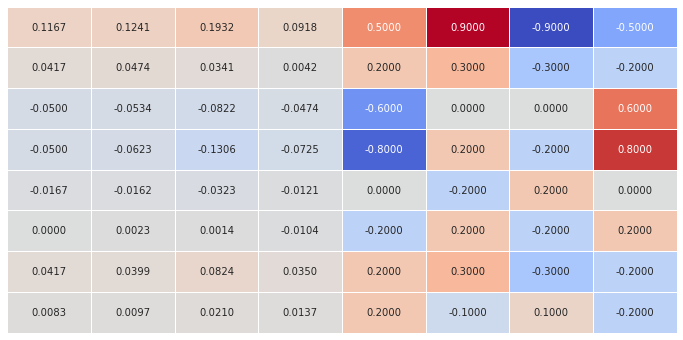

In [20]:
from matplotlib import pyplot as plt
#importa sns
import seaborn as sns
def save_styled_table_as_image(styled_table, filename):
    # Convertir el DataFrame estilizado a un DataFrame normal
    df = styled_table.data

    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(12, 6))

    # Ocultar el eje
    ax.axis('off')

    # Crear una tabla con seaborn
    sns.heatmap(df, annot=True, fmt=".4f", cmap="coolwarm", cbar=False, linewidths=.5, ax=ax)

    # Guardar la imagen
    plt.savefig(filename, bbox_inches='tight')
# Guardar la tabla estilizada como una imagen
save_styled_table_as_image(styled_tabla_sustraccion, 'tabla_sustraccion.png')

In [23]:
#setea los valores a 4 decimales y redondealo
promedio_nomral= promedios_por_modelo_2.round(4)

In [24]:
promedio_bio=promedios_por_modelo_bio.round(4)

In [25]:
tabla_sustraccion_1 = promedio_nomral - promedio_bio
tabla_sustraccion_1

,Accuracy,F1 Score (weighted),MCC,Balanced Accuracy,TP,TN,FP,FN
Model,,,,,,,,
boosting,0.1166,0.1241,0.1932,0.0917,0.5,0.9,-0.9,-0.5
decision,0.0417,0.0474,0.0341,0.0042,0.2,0.3,-0.3,-0.2
k-nearest,-0.0500,-0.0534,-0.0822,-0.0474,-0.6,0.0,0.0,0.6
logistic,-0.0500,-0.0623,-0.1306,-0.0725,-0.8,0.2,-0.2,0.8
mlp,-0.0166,-0.0163,-0.0323,-0.0121,0.0,-0.2,0.2,0.0
naive,0.0000,0.0023,0.0014,-0.0105,-0.2,0.2,-0.2,0.2
random,0.0416,0.0399,0.0824,0.0350,0.2,0.3,-0.3,-0.2
svm,0.0084,0.0097,0.0210,0.0138,0.2,-0.1,0.1,-0.2
